In [74]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('pyspark example1').getOrCreate() #chaining
#Sparkcontext

In [4]:
#RDD에서 다룰수 있는데이터타입 TypeSafe
# 1. 비정형 데이터, json, txt, str  2.정형 데이터 - 리스트, csv, table

In [91]:
rdd1=spark.sparkContext.textFile('/home/jovyan/work/start_spark/running_spark_data/log.txt')
rdd1

/home/jovyan/work/start_spark/running_spark_data/log.txt MapPartitionsRDD[12] at textFile at NativeMethodAccessorImpl.java:0

In [92]:
rdd1.take(3)

['2025-07-31 10:00:01 INFO User=kim ACTION=LOGIN RESULT=SUCCESS',
 '2025-07-31 10:05:43 WARN User=lee ACTION=DOWNLOAD RESULT=FAIL',
 '2025-07-31 10:08:22 INFO User=park ACTION=UPLOAD RESULT=SUCCESS']

In [93]:
import json
rdd2 = spark.sparkContext.textFile('/home/jovyan/work/start_spark/running_spark_data/data.json').map(json.loads)

In [94]:
rdd2

PythonRDD[16] at RDD at PythonRDD.scala:53

In [95]:
rdd2.take(3)

[{'user': 'kim',
  'action': 'login',
  'result': 'success',
  'time': '2025-07-31 10:00:01'},
 {'user': 'lee',
  'action': 'download',
  'result': 'fail',
  'time': '2025-07-31 10:05:43'},
 {'user': 'park',
  'action': 'upload',
  'result': 'success',
  'time': '2025-07-31 10:08:22'}]

In [34]:
#스파크 컨텍스트 객체
#1.SparkSession.getOrCreate()- > 세션객체로부터 사전에 설정된 변수에 맞춰 컨텍스트 발생
#2.SparkConf + SparkContext -> 저수준 연산

In [48]:
spark.stop()

In [73]:
from pyspark import SparkConf, SparkContext
conf = SparkConf().setMaster('local').setAppName('country-student-counts2')
conf

In [41]:
spark = SparkContext(conf=conf).getOrCreate()

In [43]:
spark.getConf().getAll()

[('spark.master', 'local'),
 ('spark.executor.id', 'driver'),
 ('spark.app.startTime', '1754026268408'),
 ('spark.driver.extraJavaOptions',
  '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false'),
 ('spark.app.name', 'country-student-counts2'),
 

In [96]:
spark.stop()

In [4]:
import os
os.getcwd() #컨테이너 내부경로

'/home/jovyan/work/start_spark/start_spark'

In [73]:
dir = os.path.join(os.getcwd(), 'running_spark_data')

In [64]:
dir

'/home/jovyan/work/start_spark/running_spark_data'

In [107]:
filename = 'xAPI-Edu-Data.csv'
filepath = os.path.join(dir, filename)
filepath

'/home/jovyan/work/start_spark/running_spark_data/xAPI-Edu-Data.csv'

In [ ]:
#외부 저장소에서 데이터를 로드 RDD를 생성

In [108]:
spark = SparkContext(conf=conf).getOrCreate()

In [109]:

lines=spark.textFile('file:///'+filepath.replace('\\','/'))

In [110]:
lines.take(1)

['gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class']

In [83]:
lines.count() #대용량일 경우에는 문제가 된다.

481

In [84]:
#데이터의 처리

In [111]:
header=lines.first()
header

'gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class'

In [112]:
datas = lines.filter(lambda row : row !=header)
datas.take(3)

['M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L']

In [113]:
countries = datas.map(lambda row : row.split(',')[2])

In [114]:
countries

PythonRDD[5] at RDD at PythonRDD.scala:53

In [115]:
countries.take(3)

['KuwaIT', 'KuwaIT', 'KuwaIT']

In [117]:
result=countries.countByValue()
result

defaultdict(int,
            {'KuwaIT': 180,
             'lebanon': 19,
             'Egypt': 9,
             'SaudiArabia': 16,
             'USA': 16,
             'Jordan': 176,
             'venzuela': 1,
             'Iran': 6,
             'Tunis': 9,
             'Morocco': 4,
             'Syria': 6,
             'Iraq': 22,
             'Palestine': 10,
             'Lybia': 6})

In [118]:
result.items()

dict_items([('KuwaIT', 180), ('lebanon', 19), ('Egypt', 9), ('SaudiArabia', 16), ('USA', 16), ('Jordan', 176), ('venzuela', 1), ('Iran', 6), ('Tunis', 9), ('Morocco', 4), ('Syria', 6), ('Iraq', 22), ('Palestine', 10), ('Lybia', 6)])

In [122]:
sorted(result.items(), key= lambda x: x[1], reverse=True)

[('KuwaIT', 180),
 ('Jordan', 176),
 ('Iraq', 22),
 ('lebanon', 19),
 ('SaudiArabia', 16),
 ('USA', 16),
 ('Palestine', 10),
 ('Egypt', 9),
 ('Tunis', 9),
 ('Iran', 6),
 ('Syria', 6),
 ('Lybia', 6),
 ('Morocco', 4),
 ('venzuela', 1)]

In [136]:
sorted(result.items(), key= lambda x: x[1], reverse=True)[:3]

[('KuwaIT', 180), ('Jordan', 176), ('Iraq', 22)]

In [138]:
sum(result.values())

480

In [152]:
for country, value in result.items():
    # 비율 계산 (소수점 셋째 자리에서 반올림)
    percentage = (value / total_sum) * 100
    print(f"- {country}: {percentage:.2f}%")

- KuwaIT: 37.50%
- lebanon: 3.96%
- Egypt: 1.88%
- SaudiArabia: 3.33%
- USA: 3.33%
- Jordan: 36.67%
- venzuela: 0.21%
- Iran: 1.25%
- Tunis: 1.88%
- Morocco: 0.83%
- Syria: 1.25%
- Iraq: 4.58%
- Palestine: 2.08%
- Lybia: 1.25%


In [146]:
total_sum = sum(value for country, value in result.items())
percentages = [(country, (value / total_sum) * 100) for country, value in result.items()]

# 3. 결과 출력
print(f"전체 합계: {total_sum}\n")
print("국가별 비율:")

for country, percentage in percentages:
    print(f"- {country}: {percentage:.2f}%")

전체 합계: 480

국가별 비율:
- KuwaIT: 37.50%
- lebanon: 3.96%
- Egypt: 1.88%
- SaudiArabia: 3.33%
- USA: 3.33%
- Jordan: 36.67%
- venzuela: 0.21%
- Iran: 1.25%
- Tunis: 1.88%
- Morocco: 0.83%
- Syria: 1.25%
- Iraq: 4.58%
- Palestine: 2.08%
- Lybia: 1.25%


<BarContainer object of 14 artists>

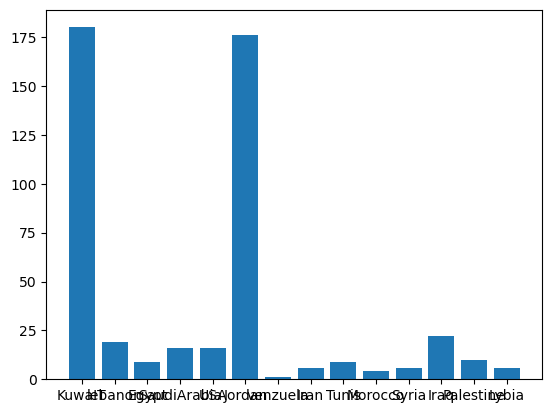

In [186]:
import matplotlib.pyplot as plt
countries =list(result.keys())
counts = list(result.values())
plt.bar(countries, counts)

In [223]:
data = ["KuwaIT", "lebanon", "Jordan", "Jordan", "USA", "Egypt", 
        "Jordan", "USA", "Iran", "Iran", "KuwaIT"]

In [224]:
rdd = spark.sparkContext.parallelize(data)

In [225]:
countries_lower = rdd.map(lambda country: country.lower())

In [226]:

spark = SparkSession.builder.appName("CountryFilter").getOrCreate()

In [228]:
filtered_rdd=countries_lower.filter(lambda country: country == "jordan")

In [221]:
#소문자로 변환, jordan추출, 몇개국인지 새보기

In [229]:
print(filtered_rdd.collect())

['jordan', 'jordan', 'jordan']


In [230]:
dd=countries_lower.distinct()

In [231]:
dd.count()

6

In [175]:
#국가별 빈도수

In [232]:
country_pairs=countries_lower.map(lambda x:(x,1))

In [233]:
country_pairs.take(1)

[('kuwait', 1)]

In [206]:

# SparkSession 종료
spark.stop()

In [234]:
country_counts = country_pairs.reduceByKey(lambda a,b : a+b)

In [235]:
country_counts.take(2)

[('kuwait', 2), ('lebanon', 1)]

In [236]:
country_counts.take(6)

[('kuwait', 2),
 ('lebanon', 1),
 ('egypt', 1),
 ('jordan', 3),
 ('usa', 2),
 ('iran', 2)]

In [239]:
country_counts.collect()

[('kuwait', 2),
 ('lebanon', 1),
 ('egypt', 1),
 ('jordan', 3),
 ('usa', 2),
 ('iran', 2)]

In [240]:
country_counts.sortByKey().collect()

[('egypt', 1),
 ('iran', 2),
 ('jordan', 3),
 ('kuwait', 2),
 ('lebanon', 1),
 ('usa', 2)]

In [242]:
country_counts.sortBy(lambda x:x[1], ascending=False).collect()

[('jordan', 3),
 ('kuwait', 2),
 ('usa', 2),
 ('iran', 2),
 ('lebanon', 1),
 ('egypt', 1)]

In [247]:
country_counts.sortBy(lambda x:x[0], ascending=False).collect()

[('usa', 2),
 ('lebanon', 1),
 ('kuwait', 2),
 ('jordan', 3),
 ('iran', 2),
 ('egypt', 1)]

In [261]:
countries_lower.reduce(lambda a, b: a+','+b) #변환

'kuwait,lebanon,jordan,jordan,usa,egypt,jordan,usa,iran,iran,kuwait'

In [260]:
#저장소에 저장하기

In [6]:
output_path='output_path/countries_result'

In [72]:
countries_lower.saveAsTextFile(output_path)# 저장소 경로

NameError: name 'countries_lower' is not defined

In [2]:
import shutil

In [76]:
if os.path.exists(output_path):
    shutil.rmtree(output_path)
countries_lower.saveAsTextFile(output_path)

NameError: name 'countries_lower' is not defined

In [67]:
import pyspark

In [80]:
rdd =spark.sparkContext.textFile('/home/jovyan/work/start_spark/start_spark/running_spark_data/mnm_dataset.csv')

In [81]:
header = rdd.first()
data = rdd.filter(lambda line: line!=header)\
        .map(lambda line: line.split(','))

In [83]:
data.take(3)

[['TX', 'Red', '20'], ['NV', 'Blue', '66'], ['CO', 'Blue', '79']]

In [90]:
rdd1= data.map(lambda x: (x[0], int(x[2])))

In [92]:
rdd1.take(3)

[('TX', 20), ('NV', 66), ('CO', 79)]

In [102]:
rdd2= rdd1.reduceByKey(lambda a,b : a+b)
rdd1.take(3)

[('TX', 556493), ('NV', 548477), ('CO', 556302)]

In [110]:
rdd3=data.map(lambda x : ((x[0], x[1]), int(x[2])))\
    .reduceByKey(lambda a,b: a+b)

In [111]:
rdd3.take(3)

[(('TX', 'Red'), 95404), (('NV', 'Blue'), 90003), (('CO', 'Blue'), 93412)]

In [119]:
import shutil
output_path='/home/jovyan/work/start_spark/start_spark/output_path'
if os.path.exists(output_path):
    shutil.rmtree(output_path)
    rdd3.saveAsTextFile(output_path)

In [10]:
dir = os.path.join(os.getcwd(), 'running_spark_data')

In [47]:
filename = 'mnm_dataset.csv'
filepath = os.path.join(dir, filename)
filepath

'/home/jovyan/work/start_spark/start_spark/running_spark_data/mnm_dataset.csv'

In [48]:
spark = SparkContext(conf=conf).getOrCreate()

In [49]:
lines=spark.textFile('file:///'+filepath.replace('\\','/'))

In [50]:
lines.collect()


['State,Color,Count',
 'TX,Red,20',
 'NV,Blue,66',
 'CO,Blue,79',
 'OR,Blue,71',
 'WA,Yellow,93',
 'WY,Blue,16',
 'CA,Yellow,53',
 'WA,Green,60',
 'OR,Green,71',
 'TX,Green,68',
 'NV,Green,59',
 'AZ,Brown,95',
 'WA,Yellow,20',
 'AZ,Blue,75',
 'OR,Brown,72',
 'NV,Red,98',
 'WY,Orange,45',
 'CO,Blue,52',
 'TX,Brown,94',
 'CO,Red,82',
 'CO,Red,12',
 'CO,Red,17',
 'OR,Green,16',
 'AZ,Green,46',
 'NV,Red,43',
 'NM,Yellow,15',
 'WA,Red,12',
 'OR,Green,13',
 'CO,Blue,95',
 'WY,Red,63',
 'TX,Orange,63',
 'WY,Yellow,48',
 'OR,Green,95',
 'WA,Red,75',
 'CO,Orange,93',
 'NV,Orange,10',
 'WY,Green,15',
 'WA,Green,99',
 'CO,Blue,98',
 'CA,Green,86',
 'UT,Red,92',
 'AZ,Brown,16',
 'CA,Red,100',
 'UT,Red,77',
 'TX,Yellow,29',
 'WA,Orange,73',
 'WY,Yellow,56',
 'WA,Yellow,19',
 'WY,Yellow,18',
 'AZ,Orange,49',
 'WA,Red,83',
 'AZ,Red,59',
 'CA,Blue,13',
 'CO,Brown,53',
 'CA,Red,23',
 'CA,Yellow,49',
 'NV,Blue,50',
 'CO,Red,81',
 'UT,Green,62',
 'NM,Green,38',
 'NV,Yellow,77',
 'TX,Blue,49',
 'WA,Brown,

In [56]:
import io
from pyspark import SparkContext, SparkConf

In [57]:
header = lines.first()
data_rdd = lines.filter(lambda line: line != header)

kv_rdd = data_rdd.map(lambda line: line.split(',')).map(lambda parts: (parts[1], int(parts[2])))

In [58]:
stats_rdd = kv_rdd.aggregateByKey(
    (0, 0, float('inf'), float('-inf')),  # zeroValue
    lambda acc, value: (acc[0] + value, acc[1] + 1, min(acc[2], value), max(acc[3], value)), # seqOp
    lambda acc1, acc2: (acc1[0] + acc2[0], acc1[1] + acc2[1], min(acc1[2], acc2[2]), max(acc1[3], acc2[3])) # combOp
)

In [62]:
# `mapValues`를 사용하여 합계와 개수로 평균을 계산
final_results = stats_rdd.mapValues(lambda acc: {
    'count': acc[1],
    'sum': acc[0],

}).collect()

In [63]:
print("--- 색깔별 Count 통계 요약 ---\n")
for color, stats in final_results:
    print(f"색깔: {color}")
    print(f"  총 개수: {stats['count']}")
    print(f"  합계: {stats['sum']}")


--- 색깔별 Count 통계 요약 ---

색깔: Red
  총 개수: 16619
  합계: 916864
색깔: Blue
  총 개수: 16449
  합계: 902516
색깔: Yellow
  총 개수: 16796
  합계: 923009
색깔: Green
  총 개수: 16928
  합계: 926150
색깔: Brown
  총 개수: 16510
  합계: 915703
색깔: Orange
  총 개수: 16697
  합계: 915793


In [65]:
# 2. 데이터를 ((주, 색깔), 개수) 형태의 키-값 쌍으로 파싱
# 각 라인에서 주(parts[0])와 색깔(parts[1])을 복합 키로 사용하고, 개수(parts[2])를 값으로 사용합니다.
kv_rdd_by_color_state = data_rdd.map(lambda line: line.split(',')).map(lambda parts: ((parts[0], parts[1]), int(parts[2])))

# 동일한 키(주, 색깔)를 가진 값들을 모두 합산합니다.
counts_by_color_state = kv_rdd_by_color_state.reduceByKey(lambda a, b: a + b)

# RDD를 (주, (색깔, 개수)) 형태로 변환한 후 주를 기준으로 그룹화합니다.
grouped_by_state = counts_by_color_state.map(lambda x: (x[0][0], (x[0][1], x[1]))).groupByKey()

# 결과를 보기 좋게 딕셔너리 형태로 변환하고 출력합니다.
final_results = grouped_by_state.mapValues(lambda color_counts: sorted(list(color_counts))).collect()

print("--- 주별 색깔별 Count 통계 요약 ---\n")
for state, color_counts in final_results:
    print(f"주: {state}")
    for color, count in color_counts:
        print(f"  - {color}: {count}개")
    print("\n")

# SparkContext 종료

--- 주별 색깔별 Count 통계 요약 ---

주: TX
  - Blue: 88466개
  - Brown: 90736개
  - Green: 95753개
  - Orange: 92315개
  - Red: 95404개
  - Yellow: 93819개


주: NV
  - Blue: 90003개
  - Brown: 92478개
  - Green: 91331개
  - Orange: 93929개
  - Red: 89346개
  - Yellow: 91390개


주: CO
  - Blue: 93412개
  - Brown: 93692개
  - Green: 93724개
  - Orange: 90971개
  - Red: 89465개
  - Yellow: 95038개


주: OR
  - Blue: 90526개
  - Brown: 89136개
  - Green: 89578개
  - Orange: 94514개
  - Red: 90286개
  - Yellow: 88129개


주: WA
  - Blue: 89886개
  - Brown: 93082개
  - Green: 96486개
  - Orange: 91521개
  - Red: 93332개
  - Yellow: 92920개


주: WY
  - Blue: 91002개
  - Brown: 86110개
  - Green: 94339개
  - Orange: 87956개
  - Red: 91768개
  - Yellow: 87800개


주: CA
  - Blue: 89123개
  - Brown: 95762개
  - Green: 93505개
  - Orange: 90311개
  - Red: 91527개
  - Yellow: 100956개


주: AZ
  - Blue: 89971개
  - Brown: 92287개
  - Green: 91882개
  - Orange: 91684개
  - Red: 90042개
  - Yellow: 90946개


주: NM
  - Blue: 90150개
  - Brown: 93447개
  - Green:

In [ ]:
spark.stop()

In [126]:
!python mnms_result.py

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/08/04 01:59:36 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/08/04 01:59:36 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
결과 미리보기----
(('TX', 'Red'), 95404)
(('NV', 'Blue'), 90003)
(('CO', 'Blue'), 93412)
(('OR', 'Blue'), 90526)
(('WA', 'Yellow'), 92920)
총 데이터 라인 수 : 60
